In [ ]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot') 

In [3]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [4]:
matches.head(), deliveries.head()

(       id   season        city        date match_type player_of_match  \
 0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
 1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
 2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
 3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
 4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \


MATCHES PLAYED PER SEASON

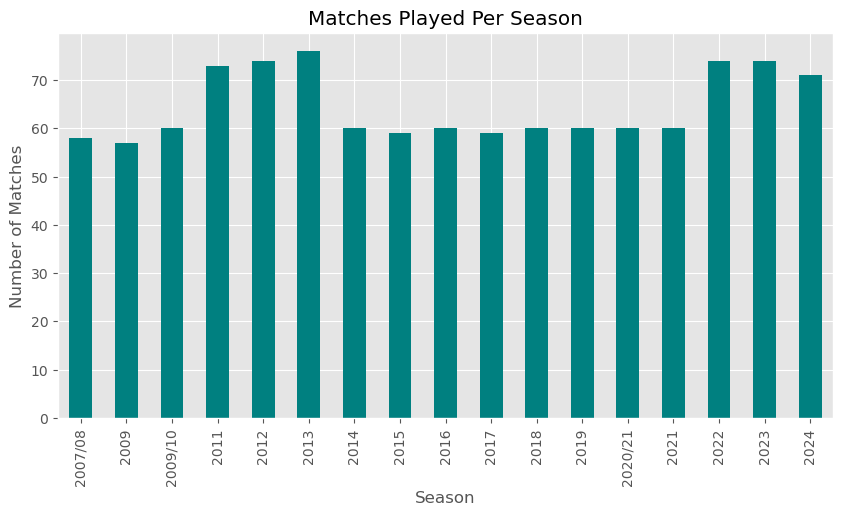

In [5]:
matches_per_season = matches['season'].value_counts().sort_index()
matches_per_season.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()

In [ ]:
# Check the number of matches played in each season

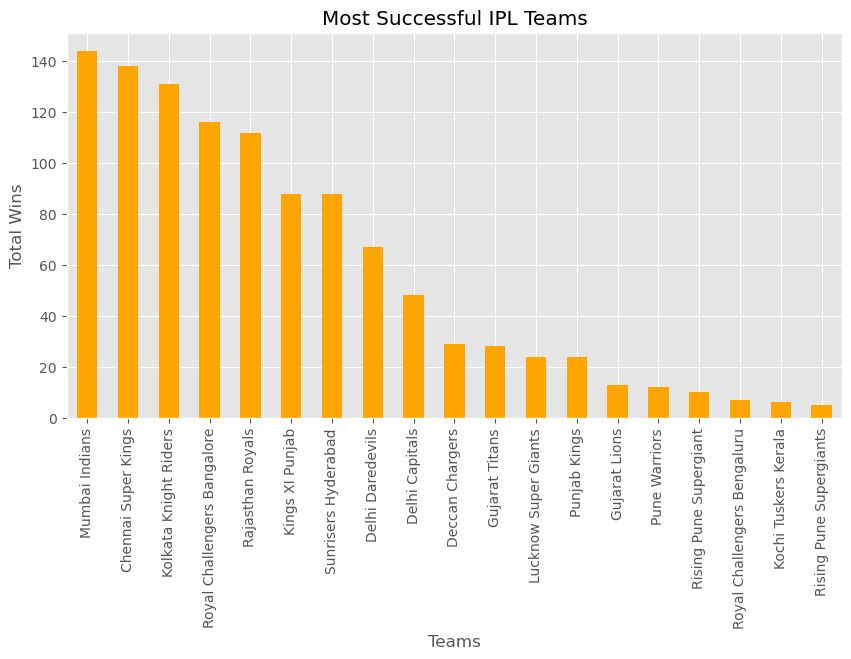

In [7]:
team_wins = matches['winner'].value_counts()
team_wins.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Most Successful IPL Teams")
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.show()

In [ ]:
#Toss Decision Impact
toss_match_winner = matches[matches['toss_winner'] == matches['winner']]
toss_win_rate = len(toss_match_winner) / len(matches) * 100
print(f"Toss winner also won the match in {toss_win_rate:.2f}% of cases")


Toss winner also won the match in 50.59% of cases


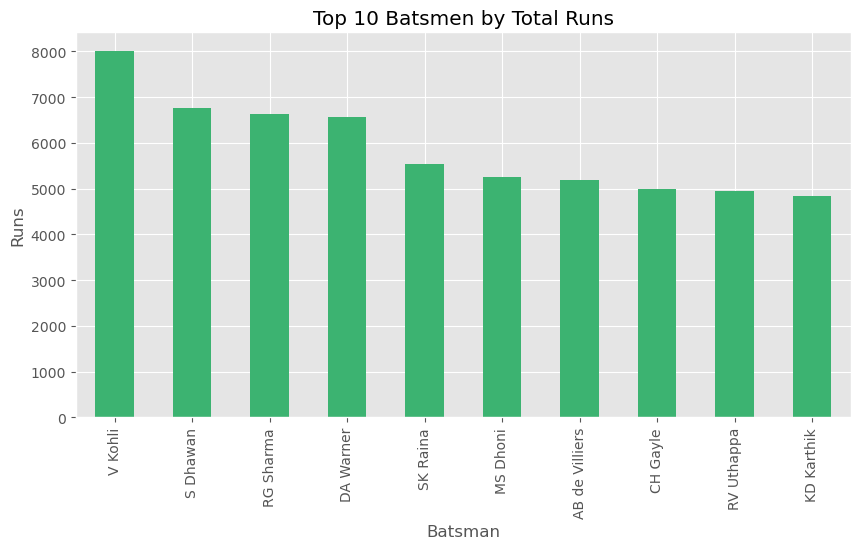

In [ ]:
#Top 10 Batsmen by Runs
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.title("Top 10 Batsmen by Total Runs")
plt.ylabel("Runs")
plt.xlabel("Batsman")
plt.show()


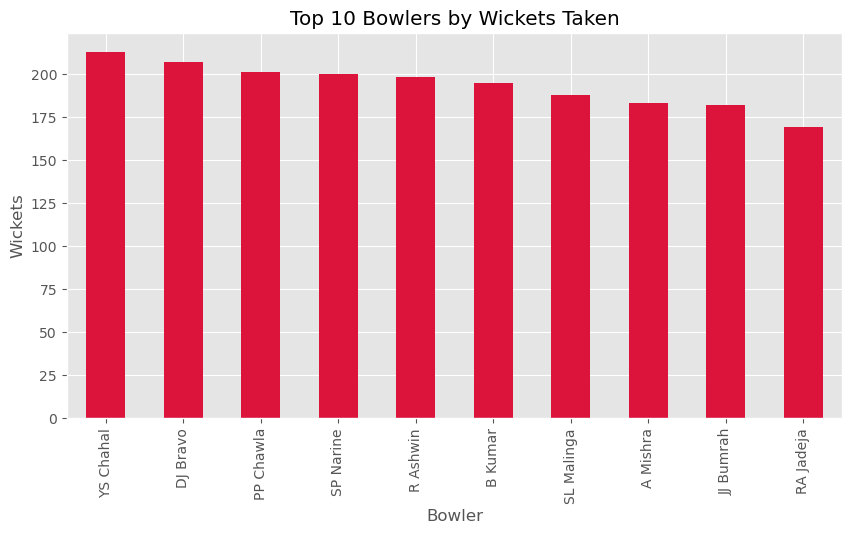

In [10]:
#   Top 10 Bowlers by Wickets Taken
wickets = deliveries[deliveries['dismissal_kind'].notna()]
top_bowlers = wickets['bowler'].value_counts().head(10)
top_bowlers.plot(kind='bar', figsize=(10, 5), color='crimson')
plt.title("Top 10 Bowlers by Wickets Taken")
plt.ylabel("Wickets")
plt.xlabel("Bowler")
plt.show()


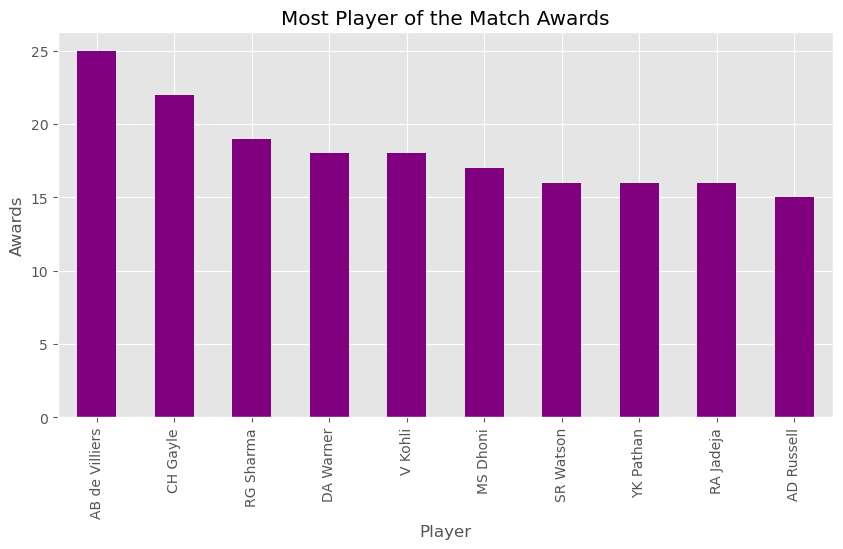

In [ ]:
#  Most Player of the Match Awards
top_players = matches['player_of_match'].value_counts().head(10)
top_players.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Most Player of the Match Awards")
plt.ylabel("Awards")
plt.xlabel("Player")
plt.show()


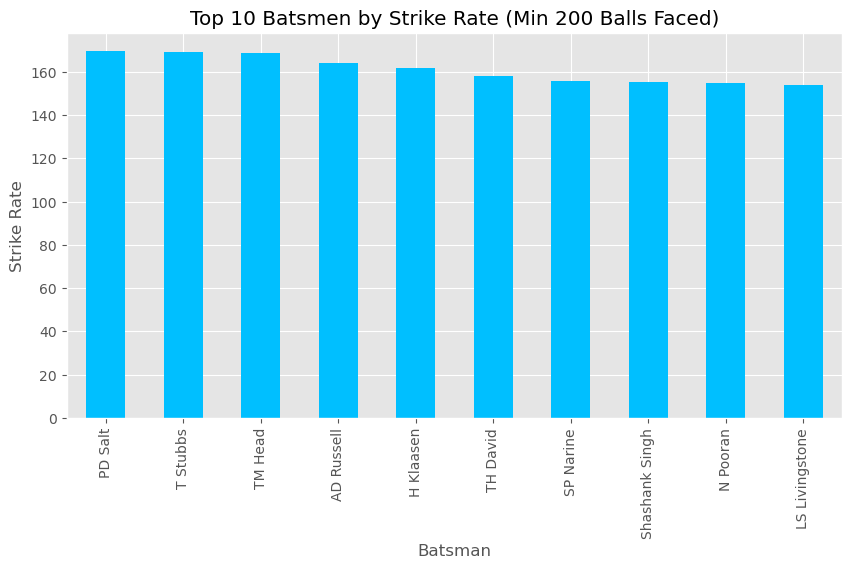

In [ ]:
#  Top 10 Batsmen by Strike Rate (Min 200 balls faced)
balls_faced = deliveries.groupby('batter')['ball'].count()
total_runs = deliveries.groupby('batter')['batsman_runs'].sum()
strike_rate = (total_runs / balls_faced) * 100
qualified_batsmen = strike_rate[balls_faced > 200].sort_values(ascending=False).head(10)

qualified_batsmen.plot(kind='bar', figsize=(10,5), color='deepskyblue')
plt.title("Top 10 Batsmen by Strike Rate (Min 200 Balls Faced)")
plt.ylabel("Strike Rate")
plt.xlabel("Batsman")
plt.show()
